In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


colors = sns.color_palette("muted").as_hex()
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams["figure.figsize"] = (9, 5)

In [3]:
df = pd.DataFrame()
for proj in ["JPetStore", "DayTrader", "AcmeAir", "Plants"]:
	with open(f"../results/Mo2oM_Full/Mo2oM_Full_{proj}.json") as f:
		data = json.load(f)
	new_df = pd.DataFrame(data).drop(["microservices", "n_clusters"], axis=1)
	# new_df = pd.DataFrame(data).drop(["microservices"], axis=1)
	new_df = new_df[(new_df["threshold"] != 0) & (new_df["threshold"] != 1)]
	new_df = new_df.groupby("threshold", as_index=False).mean()
	# new_df["project"] = proj
	df = pd.concat([df, new_df])
df = df.groupby("threshold", as_index=False).mean()

In [4]:
df

,threshold,SM,ICP,IFN,NED
0,0.05,0.295464,0.077927,0.213295,0.524985
1,0.10,0.300312,0.083224,0.254028,0.505178
2,0.15,0.304562,0.088411,0.330485,0.478732
3,0.20,0.301359,0.094765,0.426509,0.467017
4,0.25,0.307955,0.100667,0.530067,0.466271
5,0.30,0.312848,0.105818,0.669558,0.479261
6,0.35,0.284145,0.115674,0.801015,0.449350
7,0.40,0.282148,0.118357,0.994673,0.450177
8,0.45,0.285926,0.127230,1.109946,0.445034
9,0.50,0.290557,0.137679,1.282560,0.433895


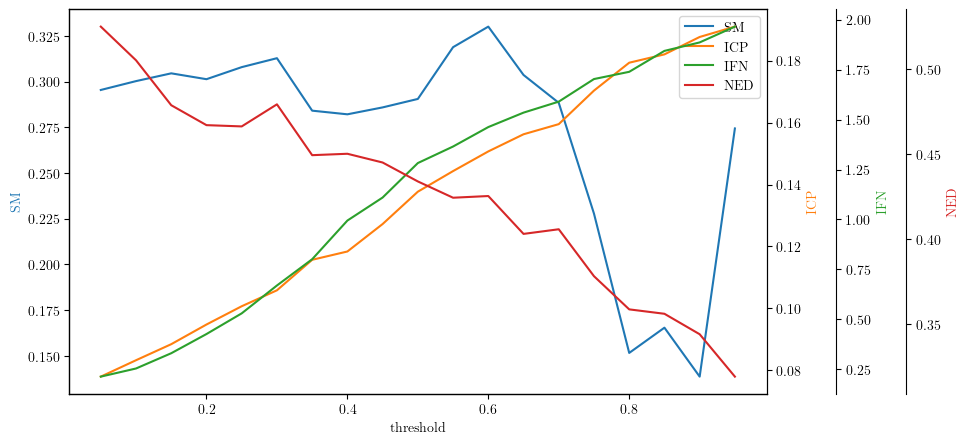

In [26]:
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))
p1, = ax.plot(df["threshold"], df["SM"], "-C0", label="SM")
p2, = twin1.plot(df["threshold"], df["ICP"], "-C1", label="ICP")
p3, = twin2.plot(df["threshold"], df["IFN"], "-C2", label="IFN")
p4, = twin3.plot(df["threshold"], df["NED"], "-C3", label="NED")
# p1.set_color(colors[0])
# p2.set_color(colors[1])
# p3.set_color(colors[2])
# p4.set_color(colors[3])
ax.set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="IFN")
twin3.set(ylabel="NED")
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
ax.legend(handles=[p1, p2, p3, p4])
# fig.savefig("JPetStoreLineChart.pdf", bbox_inches="tight")

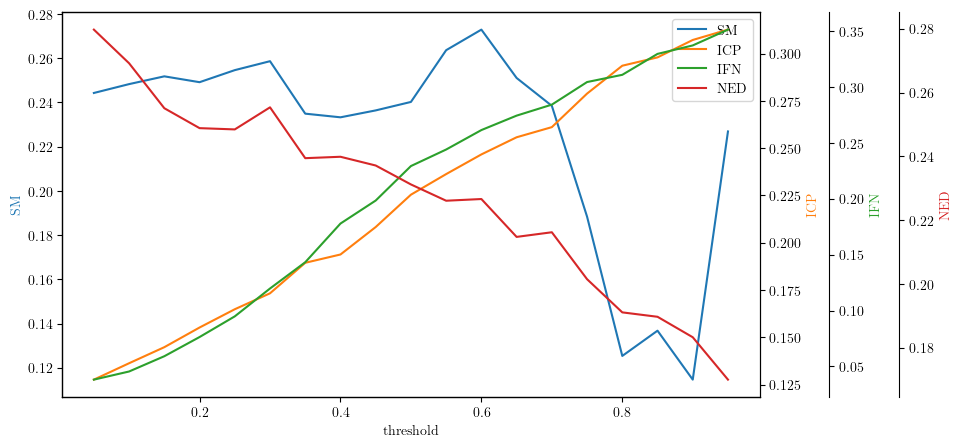

In [27]:
from sklearn.preprocessing import normalize
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))
p1, = ax.plot(df["threshold"], normalize([df["SM"].to_list()])[0], "-C0", label="SM")
p2, = twin1.plot(df["threshold"], normalize([df["ICP"].to_list()])[0], "-C1", label="ICP")
p3, = twin2.plot(df["threshold"], normalize([df["IFN"].to_list()])[0], "-C2", label="IFN")
p4, = twin3.plot(df["threshold"], normalize([df["NED"].to_list()])[0], "-C3", label="NED")
# p1.set_color(colors[0])
# p2.set_color(colors[1])
# p3.set_color(colors[2])
# p4.set_color(colors[3])
ax.set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="IFN")
twin3.set(ylabel="NED")
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
ax.legend(handles=[p1, p2, p3, p4])
# fig.savefig("JPetStoreLineChart.pdf", bbox_inches="tight")

In [8]:
def get_top_percent(df, percent, metric, ascending=True):
	df_sorted = df.sort_values(by=metric, ascending=ascending)
	n_top = int(len(df) * percent)
	top = df_sorted.head(n_top)
	thresholds_top = top['threshold'].tolist()
	return set(sorted(thresholds_top))

In [10]:
sm = get_top_percent(df, 0.3, "SM", ascending=False)
icp = get_top_percent(df, 0.5, "ICP")
ifn = get_top_percent(df, 0.5, "IFN")
ned = get_top_percent(df, 0.9, "NED")
print(sorted(list(sm.intersection(icp, ifn, ned))))

[0.15, 0.25, 0.3]
